In [1]:
import numpy as np
import torch
from train_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
#V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
V_file = "V_diff.npy"
C_syn_e_file = "handsub153_C_syn_e.npy"
C_syn_i_file = "handsub153_C_syn_i.npy"
C_den_file = "handsub153_C_den.npy"


E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
#V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)

V[V<0.3] = 0

In [3]:
model_type = "alpha"
T_train = 80 * 1000 * 5
T_test = 10 * 1000 * 5
T_no = 500
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")
sparse_no = 4

if (model_type == "alpha") or (model_type=="cos"):
    batch_size = 50000
    iter_no = 600
    epoch_no = 1
    lr = 0.0005
elif model_type == "alpha_cos":
    batch_size = 2500
    iter_no = 10000
    epoch_no = 5
    #lr = 0.0007
    lr = 0.0025
elif model_type == "alpha_hist":
    batch_size = 2500
    iter_no = 7500
    epoch_no = 1
    lr = 0.0025
elif model_type == "gp":
    batch_size = 60000
    iter_no = 20000
    epoch_no = 5
    lr = 0.1
elif model_type == "gp_hist":
    batch_size = 4000
    iter_no = 10000
    epoch_no = 5
    lr = 0.0005
elif model_type == "alpha_gp_hist":
    batch_size = 4000
    iter_no = 10000
    epoch_no = 5
    lr = 0.0005

In [4]:
train_glm(model_type, V, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                sparse_no, device, lr, save_dir)

1531


0 0.0017889374771321576
50 0.030900422544816397
100 0.06443948801790056
150 0.09385490875275604
200 0.1108590417660672
250 0.11502740375632303
300 0.11455295545177546
350 0.11502767708609374
400 0.11265892458120164
450 0.11488337516718394
500 0.11160981349441323
550 0.1135608842228264
599 0.11571164310889681

0.11571164223657882
0.018914796141727173


In [5]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub6_diff_output.npz")

In [6]:
test = output["test"]
C_syn_e = output["C_syn_e"]
C_syn_i = output["C_syn_i"]
filters = output["filters"]

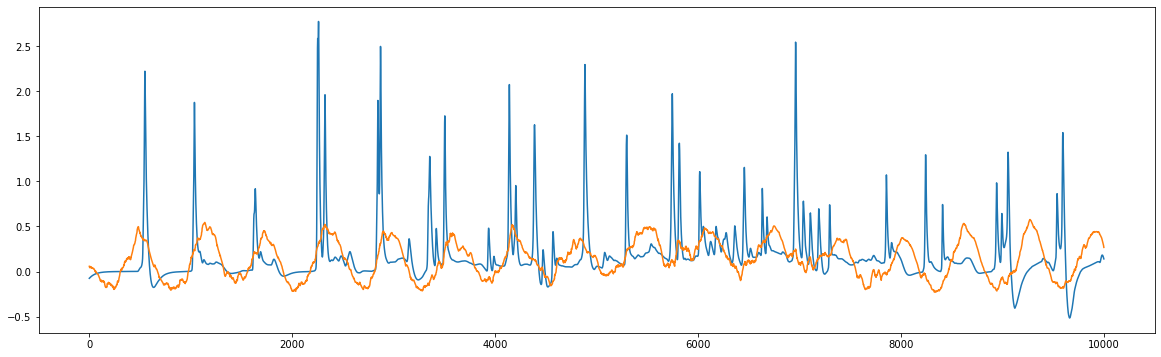

In [7]:
plt.figure(figsize = (20,6))
plt.plot(V[T_train:T_train+T_test][16000:26000][:])
plt.plot(test[16000:26000][:])


(12, 500)


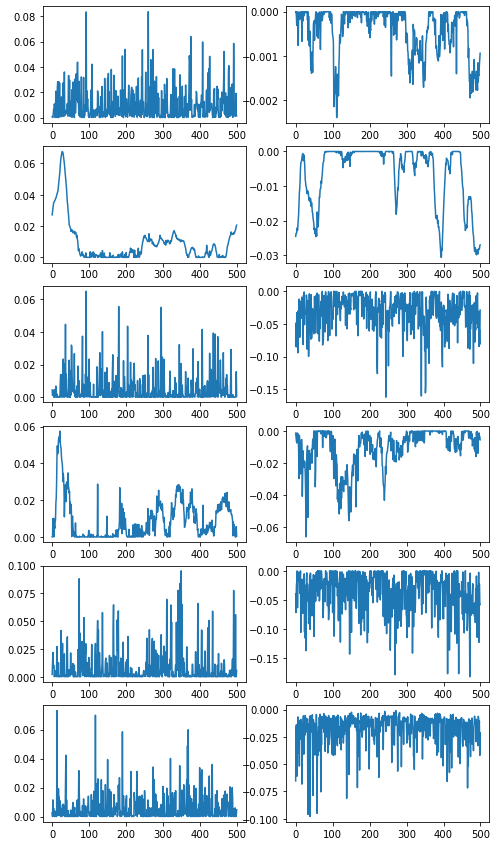

In [8]:
sub_no = 6
print(filters.shape)

fig, axs = plt.subplots(nrows=sub_no, ncols=2, figsize = (8,15))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    #axs[i,2].plot(filters[sub_no*2+i])